In [4]:
#IMPORTS
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [5]:
#DATA
#use cleaned up saved data csv from previous task (now called credit 4 after i changed col names)
rawData = pd.read_csv('credit4.csv', header = 0)
rawData.head()

,ID,LIMIT,GENDER,EDUCATION,MARRIAGE,AGE,REPAY SEP,REPAY AUG,REPAY JUL,REPAY JUN,...,BILL JUN,BILL MAY,BILL APR,PAY AMT SEP,PAY AMT AUG,PAY AMT JUL,PAY AMT JUN,PAY AMT MAY,PAY AMT APR,DEFAULT
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [6]:
#check it
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           30000 non-null  int64 
 1   LIMIT        30000 non-null  int64 
 2   GENDER       30000 non-null  object
 3   EDUCATION    30000 non-null  object
 4   MARRIAGE     30000 non-null  int64 
 5   AGE          30000 non-null  int64 
 6   REPAY SEP    30000 non-null  int64 
 7   REPAY AUG    30000 non-null  int64 
 8   REPAY JUL    30000 non-null  int64 
 9   REPAY JUN    30000 non-null  int64 
 10  REPAY MAY    30000 non-null  int64 
 11  REPAY APR    30000 non-null  int64 
 12  BILL SEP     30000 non-null  int64 
 13  BILL AUG     30000 non-null  int64 
 14  BILL JUL     30000 non-null  int64 
 15  BILL JUN     30000 non-null  int64 
 16  BILL MAY     30000 non-null  int64 
 17  BILL APR     30000 non-null  int64 
 18  PAY AMT SEP  30000 non-null  int64 
 19  PAY AMT AUG  30000 non-nu

In [7]:
#ugh objects came back... use dummies thing to make all data numeric
rawData = pd.get_dummies(rawData)
rawData.head()

,ID,LIMIT,MARRIAGE,AGE,REPAY SEP,REPAY AUG,REPAY JUL,REPAY JUN,REPAY MAY,REPAY APR,...,PAY AMT MAY,PAY AMT APR,GENDER_female,GENDER_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,DEFAULT_default,DEFAULT_not default
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


In [8]:
#recheck... and good now all numeric
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         30000 non-null  int64
 1   LIMIT                      30000 non-null  int64
 2   MARRIAGE                   30000 non-null  int64
 3   AGE                        30000 non-null  int64
 4   REPAY SEP                  30000 non-null  int64
 5   REPAY AUG                  30000 non-null  int64
 6   REPAY JUL                  30000 non-null  int64
 7   REPAY JUN                  30000 non-null  int64
 8   REPAY MAY                  30000 non-null  int64
 9   REPAY APR                  30000 non-null  int64
 10  BILL SEP                   30000 non-null  int64
 11  BILL AUG                   30000 non-null  int64
 12  BILL JUL                   30000 non-null  int64
 13  BILL JUN                   30000 non-null  int64
 14  BILL MAY              

In [9]:
#Let's drop 1 of each those superfluous columns of default and gender
rawData1 = rawData.drop(['DEFAULT_not default', 'GENDER_female'], axis=1)
rawData1.head()

,ID,LIMIT,MARRIAGE,AGE,REPAY SEP,REPAY AUG,REPAY JUL,REPAY JUN,REPAY MAY,REPAY APR,...,PAY AMT JUL,PAY AMT JUN,PAY AMT MAY,PAY AMT APR,GENDER_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,DEFAULT_default
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,1,1
1,2,120000,2,26,-1,2,0,0,0,2,...,1000,1000,0,2000,0,0,0,0,1,1
2,3,90000,2,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,0,0,0,1,0
3,4,50000,1,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,0,0,0,1,0
4,5,50000,1,57,-1,0,-1,0,0,0,...,10000,9000,689,679,1,0,0,0,1,0


In [10]:
rawData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         30000 non-null  int64
 1   LIMIT                      30000 non-null  int64
 2   MARRIAGE                   30000 non-null  int64
 3   AGE                        30000 non-null  int64
 4   REPAY SEP                  30000 non-null  int64
 5   REPAY AUG                  30000 non-null  int64
 6   REPAY JUL                  30000 non-null  int64
 7   REPAY JUN                  30000 non-null  int64
 8   REPAY MAY                  30000 non-null  int64
 9   REPAY APR                  30000 non-null  int64
 10  BILL SEP                   30000 non-null  int64
 11  BILL AUG                   30000 non-null  int64
 12  BILL JUL                   30000 non-null  int64
 13  BILL JUN                   30000 non-null  int64
 14  BILL MAY              

In [11]:
#SELECTING DATA

In [12]:
#FEATURES
#exclude dependent var y (LIMIT ie column 1)
#also excluding ID -- not a necessary feature (column 0)
#remember iloc is only up to column number, not including

X = rawData1.iloc[:,2:28]
print('Summary of feature sample')
X.head()

Summary of feature sample


,MARRIAGE,AGE,REPAY SEP,REPAY AUG,REPAY JUL,REPAY JUN,REPAY MAY,REPAY APR,BILL SEP,BILL AUG,...,PAY AMT JUL,PAY AMT JUN,PAY AMT MAY,PAY AMT APR,GENDER_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,DEFAULT_default
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,0,0,0,0,1,1
1,2,26,-1,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,0,0,0,0,1,1
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,0,0,0,0,1,0
3,1,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,0,0,0,0,1,0
4,1,57,-1,0,-1,0,0,0,8617,5670,...,10000,9000,689,679,1,0,0,0,1,0


In [13]:
#DEPENDENT VARIABLE
y = rawData1['LIMIT']
y.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT, dtype: int64

In [14]:
#dependent variable - let's check it is the correct column just to be sure... and looks good!
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT, Length: 30000, dtype: int64


In [15]:
#MODELING FORMAT

In [16]:
#alogrithms 
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [17]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [18]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4668917663499146
Linear Regression 0.35819894266116337
Support Vector Regression -0.05037380127315694


In [19]:
#well none of those seem to prove very accurate^

In [20]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [21]:
#Select Algo and Fit Model *remember to do test/train/split before this step of select and fit
algo = RandomForestRegressor()

model = algo.fit(X_train,y_train)

In [22]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.468
RMSE: 93863.287


In [23]:
#uh i don't understand what that above output tells me. 
#i read article in poa, 3 metrics are mentioned MAE, MSE, and R2 - so why did we only use rmse and r2?
#R2 - best possible score is one and can be so bad as to be negative, what about RMSE or RMAE?
#RMSE -so what is the score i should want from rmse and what does 93K mean?

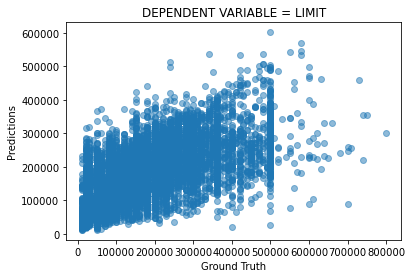

In [27]:
#Plot the Results (LIMIT as Dep Var)
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('DEPENDENT VARIABLE = LIMIT')
plt.show();

In [28]:
#wow nope. that's poor as expected from r2/rmse score

In [30]:
#now lets try DEFAULT as dependent variable y
#remember now using rawData1 after masking extra columns
rawData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         30000 non-null  int64
 1   LIMIT                      30000 non-null  int64
 2   MARRIAGE                   30000 non-null  int64
 3   AGE                        30000 non-null  int64
 4   REPAY SEP                  30000 non-null  int64
 5   REPAY AUG                  30000 non-null  int64
 6   REPAY JUL                  30000 non-null  int64
 7   REPAY JUN                  30000 non-null  int64
 8   REPAY MAY                  30000 non-null  int64
 9   REPAY APR                  30000 non-null  int64
 10  BILL SEP                   30000 non-null  int64
 11  BILL AUG                   30000 non-null  int64
 12  BILL JUL                   30000 non-null  int64
 13  BILL JUN                   30000 non-null  int64
 14  BILL MAY              

In [31]:
#DEPENDENT VARIABLE
y = rawData1['DEFAULT_default']
y.head()

#FEATURES
#exclude dependent var y (DEFAULT ie column 27)
#also excluding ID -- not a necessary feature (column 0)

X = rawData1.iloc[:,np.r_[1:27]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT,MARRIAGE,AGE,REPAY SEP,REPAY AUG,REPAY JUL,REPAY JUN,REPAY MAY,REPAY APR,BILL SEP,...,PAY AMT AUG,PAY AMT JUL,PAY AMT JUN,PAY AMT MAY,PAY AMT APR,GENDER_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,0,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,0,0,0,0,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,0,0,0,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,0,0,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,1,0,0,0,1


In [32]:
#check dependent var to be sure - yay!
print (y)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT_default, Length: 30000, dtype: uint8


In [33]:
#IMPORTS -- will need to use classification model, this time not regression as before for limit
#sklearn imports for classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [34]:
#algos for classification...
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

In [35]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [36]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8148333333333332
Decision Tree Classifier 0.7256
Gradient Boosting Classifier 0.8202666666666666


In [37]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [38]:
#Modeling (Classification) - Select and Fit
algo = RandomForestClassifier()
modelrfc = algo.fit(X_train,y_train)

In [45]:
#Predictions
preds = modelrfc.predict(X_test)

#Print full report
print('Classification Report')
print(classification_report(y_test, preds))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      7052
           1       0.61      0.37      0.46      1948

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.68      9000
weighted avg       0.79      0.81      0.80      9000



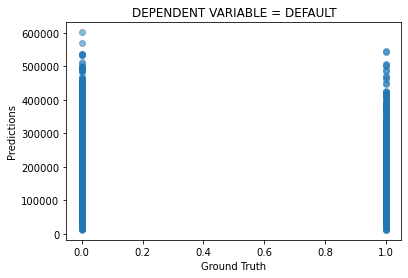

In [43]:
#Do I make a plot or a tree? let's try plotting... 

#Plot the Results (DEFAULT as Dep Var)
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('DEPENDENT VARIABLE = DEFAULT')
plt.show();

In [ ]:
#not much to see here